# Cluster Based Segmentation
Clustering algorithms are unsupervised algorithms but are similar to Classification algorithms but the basis is different.
In Clustering, you don't know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms in your dataset, unexpected things can suddenly pop-up like structures, clusters, and groupings you would have never thought otherwise.

## K-Means
K-Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.

![title](./assets/x.gif)

The objective of K-Means clustering is to minimize the sum of squared distances between all points and the cluster center.

$$L = \sum_{j=1}^{k} \sum_{i=1}^{n} D(p_i, c_j)$$
where:
* $k$ is the number of clusters (parameter that we need to choose)
* $n$ is the number of points in the space (pixels in our case)
* $c_j$ is the centeroid of the cluster $j$
* $D(p_i, c_j)$ is the distance function, it is the function that determines how close a point is to another.

We can use simple squared distance here so
$$D(p_i, c_j) = ||p_i - c_j||^2$$

### Steps of K-Means algorithm
1. Choose $k$
2. Select at random $k$ centroids
3. Assign each data point to the closest centroid
4. Compute new centroids
5. If new centroids don't change (given a threshold) finish else repeat from step 4

### How to choose k? Elbow method
The basic idea behind partitioning methods, such as K-Means clustering, is to define clusters such that the total intra-cluster variation or in other words, total within-cluster sum of square is minimized (sometimes called **WCSS**, within-class sum of squares). The intra-class variance measures the compactness of the clustering and we want it to be as small as possible.
![title](./assets/elbow.png)

For more details check
https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

In [4]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt

In [5]:
def show_images(images, titles):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    assert len(images) == len(titles)
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    fig = plt.figure()
    n_ims = len(images)
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 

# How to use show_images([list of images], [list of titles]) They must have the same length
# show_images([img1, img2], ['This is image 1', 'This is image 2'])

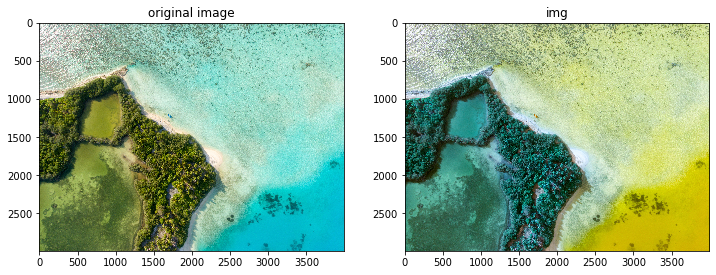

In [6]:
original_image = cv2.imread('./assets/kmeans_test_image.jpeg')
#original_image_2 = skimage.img_as_float32(original_image)
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
show_images([original_image ,img], ['original image','img'])

### How to use k-Means
We will use openCV implementation of K-Means
https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88
#### Parameters
* data: The input vector
* k: number of clusters
* bestLabels: The algorithm can be initialized with pre-calculated centers (we will use None for this parameter)
* criteria: The termination condition of the function. The paramter is a tuple (termination condition, max iteration number, epsilon)
  * cv2.TERM_CRITERIA_EPS: Stop the algorithm if each of the centroids moves less than epsilon
  * cv2.TERM_CRITERIA_MAX_ITER: Stop the algorithm after number of predefined number of iterations
  * cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER: Stop the iteration when any of the above condition is met.
* attempts: Specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output. 
* flags: How to initialize the centroids. Check the parameters at https://docs.opencv.org/master/d0/de1/group__core.html#ga276000efe55ee2756e0c471c7b270949

In [19]:
####     MY  CODE     ####
import cv2
import numpy as np
def get_k_means(feature_vector: np.ndarray, clusters_number: int, criteria, number_of_attempts: int):
    ret,label,center=cv2.kmeans(feature_vector,clusters_number,None,criteria,number_of_attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    return ret,label,center
    
    #raise NotImplementedError

def apply_k_means(img, centers, labels):
    
    res = centers[labels.flatten()]
    result_image = res.reshape((img.shape))

    return result_image
    #raise NotImplementedError
# cv2.kmeans(samples, nclusters(K), criteria, attempts, flags)

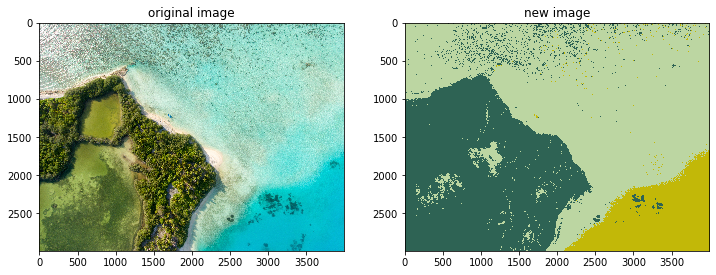

In [15]:
# TODO: Try different k values, see what will happen
# TODO: Try to add the pixel location to the flat image such that the feature vector
#       becomes [R, G, B, x, y]
flat_image = img.reshape((-1, 3))
flat_image = np.float32(flat_image)
clusters_number = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
number_of_attempts = 10

ret, labels, centers = get_k_means(flat_image,
                                   clusters_number,
                                   criteria,
                                   number_of_attempts)

new_image = apply_k_means(img, centers, labels)
show_images([original_image, new_image], ['original image', 'new image'])

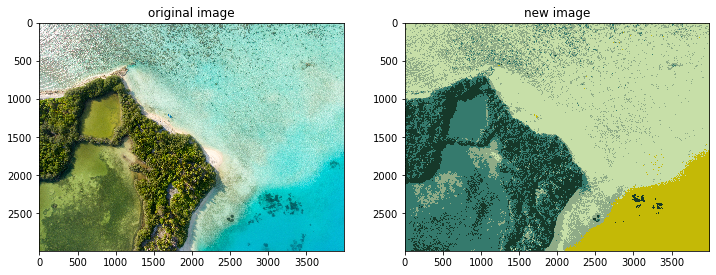

In [21]:
#k=5

flat_image = img.reshape((-1, 3))
flat_image = np.float32(flat_image)
clusters_number = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
number_of_attempts = 10

ret, labels, centers = get_k_means(flat_image,
                                   clusters_number,
                                   criteria,
                                   number_of_attempts)

new_image = apply_k_means(original_image, centers, labels)
show_images([original_image, new_image], ['original image', 'new image'])

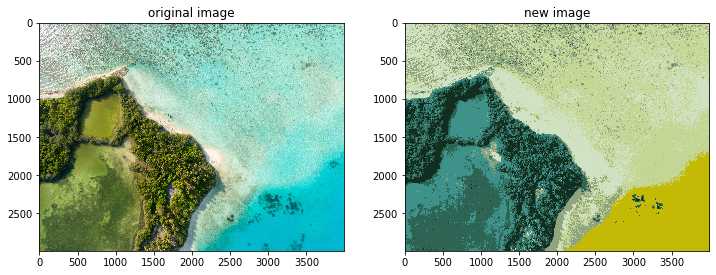

In [22]:
#k=7

flat_image = img.reshape((-1, 3))
flat_image = np.float32(flat_image)
clusters_number = 7
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
number_of_attempts = 10

ret, labels, centers = get_k_means(flat_image,
                                   clusters_number,
                                   criteria,
                                   number_of_attempts)

new_image = apply_k_means(original_image, centers, labels)
show_images([original_image, new_image], ['original image', 'new image'])

# MY ANSWER :
When we increase no. of clusters k ,segmentation becomes better .

## Mean Shift 
Unlike K-Means cluster algorithm, mean-shift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

The mean shift algorithm seeks a mode or local maximum of density of a given distribution

The **mode** of a set of data values is the value that appears most often. If $X$ is a discrete random variable, the mode is the value $x$ at which the probability mass function takes its maximum value. In other words, it is the value that is most likely to be sampled.


Given a set of datapoints, the algorithm iteratively assign each datapoint towards the closest cluster centroid (mode). The direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

### Steps
1. Choose the search window size
2. Compute the mean of the data in each search window
3. Shift the search window to the new mean location
4. Repeat unitl convergence 
5. Merge windows with similar centroid(around the same mode) using a threshold

### Steps, the math version!
1. For each datapoint $p \in X$, find the neighbouring points ($N(p)$, which is usually an Euclidean) of $p$
2. For $p \in X$ calculate **mean shift** $m(p)$ from the equation $$m(p) = \frac{\sum_{x_i \in N(p)}K(x_i - p)x_i}{\sum_{x_i \in N(p)}K(x_i - p)}$$
3. For $p \in X$ $$p = m(p)$$
4. Repeat from step 1 until the points are not moving
5. Merge the points with similar mean using a threshold

The function $$\sum_{x_i \in N(p)}K(x_i - p)$$ is simply a weight function usually Gaussian.

#### why we use Gaussian weights? 
* We want to make the motion of the $m(p)$ function as smooth as possible
* We want the contribution of the pixels near the center to be more than the further points

For more details check
http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

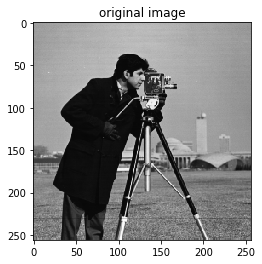

In [7]:
original_image = cv2.imread('./assets/cameraman.png')
original_image = skimage.img_as_float32(original_image)
show_images([original_image], ['original image'])
flat_img = original_image.reshape((-1, 3))

### How to use Mean Shift
We will use `scikit-learn.cluster.MeanShift` implementaion of mean shift. Note there is an implementation of mean shift but it doesn't work for segementation. Check docs at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
#### Parameters
* bandwidth: The window size. `estimate_bandwidth` is a method by `scikit-learn` to estimate the bandwidth check http://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html for more info
* bin_seeding: Instead of intializing a window per point, a window is intialized per discrete value in the data

In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Check the documentation of MeanShit here 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

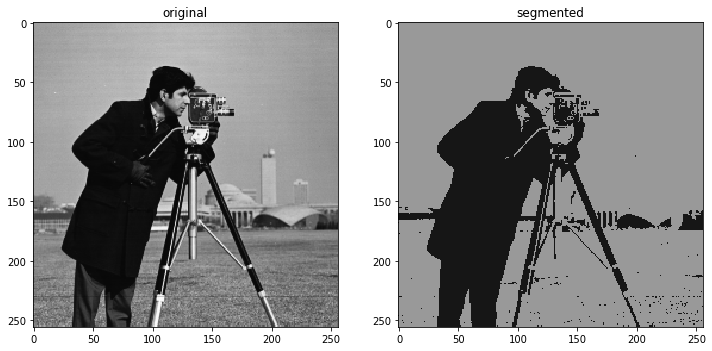

In [9]:
bandwidth = estimate_bandwidth(flat_img, quantile=0.5, n_jobs=5, n_samples=1000)    

mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(flat_img)

new_img = mean_shift.cluster_centers_[mean_shift.labels_].reshape(original_image.shape)
show_images([original_image, new_img], ['original', 'segmented'])